In [1]:
repo='NeuralNook'
name='p1'

In [2]:
!pip install -q duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 11.9 MB/s eta 0:00:00


In [3]:
from fastcore.all import *
from duckduckgo_search import ddg_images

In [4]:
def search_images(term,max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [5]:
urls=search_images('bird photos',max_images=1)
urls[0]

Searching for 'bird photos'


'https://www.almanac.com/sites/default/files/image_nodes/bluebird-3456115_1920.jpg'

In [6]:
from fastdownload import download_url 

In [7]:
dest='bird.jpg'
download_url(urls[0],dest,show_progress=False)

Path('bird.jpg')

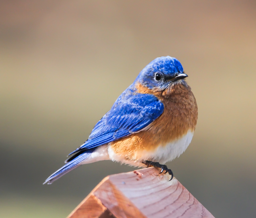

In [8]:
from fastai.vision.all import * 
im=Image.open('bird.jpg')
im.to_thumb(256,256)

Searching for 'forest photos'


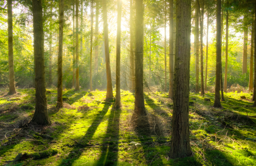

In [9]:
download_url(search_images('forest photos',max_images=1)[0], 'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [10]:
searches='forest','bird'
path=Path('brid_or_not')

from time import sleep 

for o in searches:
    dest=(path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photos'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o,max_size=400,dest=path/o)

Searching for 'forest photos'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photos'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [11]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


2

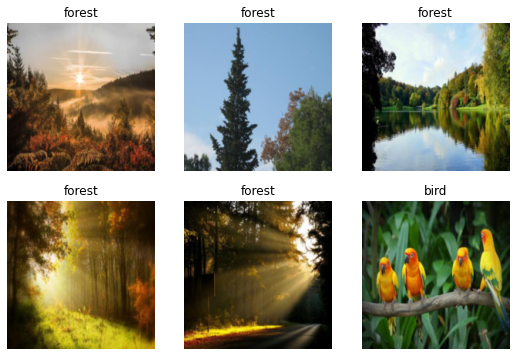

In [12]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [13]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.153204,0.310142,0.121212,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.148915,0.075709,0.030303,00:01
1,0.092287,0.051744,0.030303,00:01
2,0.061370,0.025588,0.000000,00:01


In [14]:
is_bird,_,probs=learn.predict(im)
print(f"This is a:{is_bird}")
print(f"Probability it's is a bird {probs[0]:.4f}")

This is a:bird
Probability it's is a bird 1.0000


In [19]:
!mkdir /content/Getting-Started

In [20]:
!git clone https://github.com/glunkad/NeuralNook.git 

Cloning into 'NeuralNook'...


In [21]:
%cd /content/Getting-Started

/content/Getting-Started


In [23]:
! cp /content/{name}.ipynb "$(date +"%Y_%m_%d_%I_%M_%p").ipynb"

cp: cannot stat '/content/p1.ipynb': No such file or directory


In [ ]:
import json 
repo='NeuralNook'
with open('git.json') as f:
    data=json.load(f)
git_token=data['key']
username=data['username']

In [ ]:
!git add {name}.ipynb
!git commit -m name 
!git remote add origin https://{git_token}@github.com/{username}/{repository}.git 
!git push -u origin main 